# Protein Folding

**Note:** This talktorial is a part of TeachOpenCADD, a platform that aims to teach domain-specific skills and to provide pipeline templates as starting points for research projects.

Authors:
- Mhd Jawad Al Rahwanji, DDDD seminar 2023, Volkamer lab, Saarland University
- Paula Linh Kramer, 2023, Volkamer lab, Saarland University

## Aim of this talktorial

In this notebook, we will learn about protein folding and how to predict protein structures using machine learning. This helps us understand diseases and accelerates drug development.

Our work here will include visualizing and comparing the predicted structures to their corresponding crystalline forms.

### Contents in *Theory*

* Protein Folding
    * Proteins
    * The Folding Problem
* History
    * CASP
    * Breakthroughs
* OmegaFold
    * Innerworkings and Training
    * Performance evaluation
    * More on orphan proteins and antibodies
    * Investigating the Geoformer
    * Computational performance
* Alternative Methods
    * Quantum Approach
    * Diffusion-based Models

### Contents in *Practical*

**Goal: Predict the 3D structure of a protein from a given sequence of amino acids**

* Overview
* Setup
* Processing the input sequence
* Analyzing the output predictions
  * 6YJ1
  * 7FVU
* Analyzing the secondary structures
  * 6YJ1
  * 7FVU
* Summary

### References

* [CASP](https://predictioncenter.org/)
* AlphaFold2: [Jumper *et al.*, <i>Nature</i> (2021), <b>596</b>, 583–589](https://doi.org/10.1038/s41586-021-03819-2)
* RoseTTAFold: [Baek *et al.*, <i>Science</i> (2021), <b>373</b>, 871-876](https://doi.org/10.1126/science.abj8754)
* OmegaFold: [Wu *et al.*, <i>bioRxiv</i> (2022)](https://doi.org/10.1101/2022.07.21.500999)
* [Baker lab](https://www.bakerlab.org/)
* Quantum folding: [Robert *et al.*, <i>npj Quantum Inf.</i> (2021), <b>7</b>, 38](https://doi.org/10.1038/s41534-021-00368-4)
* Protein generation: [Watson *et al.*, <i>bioRxiv</i> (2022)](https://doi.org/10.1101/2022.12.09.519842)
* [OmegaFold on Github](https://github.com/HeliXonProtein/OmegaFold)

## Theory

### Protein Folding

#### Proteins

Proteins are the building blocks of life. Our DNA encodes a series of instructions for making proteins, which play a central role in almost all biological processes. From carrying oxygen to building muscles. They lend the human body its structure, get things done around the body, transport molecules and make new molecules. Proteins are linear chains of amino acids. There are 20 such amino acids. They fold in on themselves creating unique shapes or 3D structures made up of sheets and helices. These specific shapes determine protein functionality as they facilitate binding and docking.

For example, Hemoglobin has a shape perfectly suited to binding a molecule of oxygen. Moreover, it changes the characteristics of the iron molecules causing them to hold and release oxygen molecules at different pressure levels.

<img src="./images/image1.png"  width="900">

**Image 1**: A 3D structure of a protein.

We know of over 200 million proteins, but we only know the exact 3D shape of a fraction of them. Figuring out the sequence that makes up a protein is relatively simple as it is specified by the DNA using RNA. Figuring out a protein's functionality after knowing its shape is also fairly simple. It is extremely challenging, however, to bridge the gap. In other words, computationally predicting the shape the protein translates into based on its 1D amino acid sequence.

<img src="./images/image2.png"  width="1200">

**Image 2**: Protein creation process.

#### The Folding Problem

It has been a challenge for nearly 50 years. A protein can be made up of anywhere between 50 and 2000 amino acids. Each of which has a different chemical structure. These acids even interact physically with one another pushing and pulling the folding in arbitrary directions before stabilizing. Theoretically, a protein could fold into its final 3D structure in an astronomical number of ways. In 1969, [Cyrus Levinthal](https://en.wikipedia.org/wiki/Cyrus_Levinthal) estimated that to be about $10^{300}$ possible conformations for a regular protein. Yet in the wild, proteins fold in an instant effortlessly – a paradox we refer to as [Levinthal’s paradox](https://en.wikipedia.org/wiki/Levinthal%27s_paradox).

<br/>
<img src="./images/image3.gif"  width="900">

**Image 3**: Protein folding process. Credit: DeepMind. [Source](https://techxplore.com/news/2020-01-alphafold-protein.html).

One experimental way we can study protein structures is X-ray crystallography. Another is using nuclear magnetic resonance imaging. Both methods and newer methods like cryo-electron microscopy, are time-consuming and expensive to perform.

The objective is to predict the 3D structure of a protein given a sequence of amino acids. The search space for this is enormous. Furthermore, we do not have a clear enough understanding of the process to be able to create a scoring function. Solving this problem has many positive implications. It would help us better understand the world around us, and design drugs to treat diseases or enzymes to break down plastic waste.

### History

#### CASP

Critical Assessment of Protein Structure Prediction ([CASP](https://predictioncenter.org/)) is a biennial competition to accelerate research, monitor progress, and foster the state of the art in protein structure prediction. The teams are given sequences of amino acids with known structures that haven't been revealed publicly. Their objective is to predict the structures. Then the predictions are compared to the ground truths using a metric called the global distance test (GDT). "GDT is computed over the alpha carbon atoms and is reported as a percentage, ranging from 0 to 100. In general, the higher the GDT score, the more closely a model approximates a given reference structure" ([Wiki](https://en.wikipedia.org/wiki/Global_distance_test)). Other measures include: root mean squared distance ([RMSD](https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions)) and template modeling ([TM](https://en.wikipedia.org/wiki/Template_modeling_score)) score. In the early iterations of CASP, teams used to use physical and/or chemical properties at the atom or acid level. Until 2020 no team has achieved a score higher than 50% despite using deep learning techniques.

#### Breakthroughs

In [CASP14](https://predictioncenter.org/casp14/), [AlphaFold2](https://doi.org/10.1038/s41586-021-03819-2) achieved a median GDT score of 87% in the most challenging free-modeling category. That is, reconstructing the structure of a protein without using the structural knowledge of any significant template protein. It was trained on 100 thousand proteins from the protein data bank ([PDB](https://www.rcsb.org/)) and incorporates physical and biological knowledge about protein structure to improve prediction. The team was able to predict the exact position of thousands of atoms with high resolution.

<br/>
<img src="./images/image4.jpeg"  width="1800">

**Image 4**: AlphaFold2 network architecture and performance. [Source](https://doi.org/10.1038/s41586-021-03819-2).

Following that, [RoseTTAFold](https://www.science.org/doi/10.1126/science.abj8754) was announced performing about as well with less computational costs. It tracks amino acid positions during folding and handles protein complexes. Later on, the methods for both, AlphaFold2 and RoseTTAFold, were made publicly available [here](https://github.com/deepmind/alphafold) and [here](https://github.com/RosettaCommons/RoseTTAFold), respectively.

<br/>
<img src="./images/image5.jpg"  width="1800">

**Image 5**: RoseTTAFold network architecture and performance. [Source](https://www.science.org/doi/10.1126/science.abj8754).

Recently, another model called [OmegaFold](https://doi.org/10.1101/2022.07.21.500999) was announced and its methods were also released publicly [here](https://github.com/HeliXonProtein/OmegaFold). It achieves a similar performance to AlphaFold2 and enables the prediction of orphan proteins or antibodies with noisy multiple sequence alignments (MSA) (will be discussed later).

All of these end-to-end methods rely on advancements in deep learning and databases, such as the PDB, to achieve impressive performance. Internally, they use a combination of transformers and physics-aware modules that iteratively refine their predictions of atom locations.

### OmegaFold

In this takltorial, we will focus on OmegaFold, as communicated in the original work by Wu et al. titled "[High-resolution de novo structure prediction from primary sequence](https://doi.org/10.1101/2022.07.21.500999)". It is a novel method that accurately predicts protein structures from a single sequence. As we will see, it uses a pre-trained transformer-based protein language model (OmegaPLM) that makes predictions from sequences of amino acids and a geometry-inspired transformer (Geoformer) trained on their respective conformations. Additionally, a structural head is applied for prediction. Therefore, it works well on orphan proteins that have unique functional characteristics and antibodies that have constantly evolving MSAs.

To be able to understand the novelty of OmegaFold, we will touch upon its competition. Both, AlphaFold2 and RoseTTAFold, take as input multiple sequences that are aligned to the primary one. By utilizing pairwise variations across residues, these algorithms managed to outperform previous attempts. However, their performance quickly drops in the absence of MSAs. So, the authors of OmegaFold sought to remove that requirement and took an alignment-free approach which scales 10x better (**Fig 1A**).

<img src="./images/figure1A.png"  width="1800">

**Fig. 1**: An overview. (A) Architecture. (B) Evaluations. (C) Runtime analysis. Figure credit to [the authors of OmegaFold.](https://doi.org/10.1101/2022.07.21.500999)

#### Innerworkings and Training

OmegaPLM was trained on unaligned protein sequences in a self-supervised manner, to learn powerful residue and residue-residue representations. Those embeddings capture the structural and functional characteristics of the protein sequences. Then, they are fed into the Geoformer, which encodes the geometrical and physical interactions between amino acids. In the end, the structural layer predicts a sequence of 3D coordinates of all the heavy atoms.

Three residue-masking strategies were applied to increase OmegaPLM's robustness by training to predict missing residues from what's left of the sequence (**Fig. 2A**). The same hyperparameters used in [ESM-1b](https://github.com/facebookresearch/esm) were used while the attention module was simplified. After pretraining on sequences in UniRef50, their PLM showed improved performance with reduced memory requirements.

<img src="./images/figure2A.png"  width="1200">

**Fig. 2**: OmegaPLM and geometric smoothing. (A) OmegaPLM pretraining routine. (B) Geofromer at work. (C) Geoformer evaluation. (D) Visualization of contact maps. Figure credit to [the authors of OmegaFold](https://doi.org/10.1101/2022.07.21.500999).

The purpose of the 50-layer Geofromer is to improve the embeddings such that they can predict geometrically correct coordinate predictions (**Fig 2B**). Each Geoformer layer encodes information about the residues after enforcing geometric consistency. Those latent representations should satisfy properties of [Euclidean geometry](https://en.wikipedia.org/wiki/Euclidean_geometry), and normally they do not. To this end, the nonlinear attention module was simplified and redesigned to correct the embeddings. As a result, OmegaFold encodes a geometrically correct representation of a protein sequence for it to be further encoded to a 3-dimensional space in the form of 3D coordinates (**Fig. 1A**).

<img src="./images/figure2B.png"  width="1200">

**Fig. 2**: OmegaPLM and geometric smoothing. (A) OmegaPLM pretraining routine. (B) Geofromer at work. (C) Geoformer evaluation. (D) Visualization of contact maps. Figure credit to [the authors of OmegaFold](https://doi.org/10.1101/2022.07.21.500999).

Similar to AlphaFold2, OmegaFold was trained in a multitask manner, including contact, atomic distance, and torsion angle prediction. The final model was trained on about 110000 single-chain sequences from the PDB pre-2021 in addition to all the "single domains" from the SCOP version 1.75 database while allowing at most 40% inter-sequence identity. For validation and tuning, newer structures were used making sure to eliminate any source of data leakage.

#### Performance evaluation

A set of 29 CASP proteins from the free-modeling category and 146 CAMEO proteins from 2022 of varying difficulty levels were used for evaluation. The predictions were compared to SOTAs with MSAs. Remarkably, OmegaFold's alignment-free predictions were on par with the other methods (**Fig. 1B**). As for the CAMEO set, OmegaFold's structures achieved an average local-distance difference test (LDDT) score of 0.82 (LDDT is a metric for structure evaluation). On the CASP dataset, the average TM-score of 0.79 --a common measure for the topological similarity of proteins-- was slightly lower than that of other SOTAs. Single-sequence versions of the aforementioned datasets were tested. In this case, AlphaFold2 and RoseTTAFold's predictions were significantly outperformed by those of OmegaFold (**Fig. 1B**), confirming OmegaFold's edge over the rest.

<img src="./images/figure1B.png"  width="1800">

**Fig. 1**: An overview. (A) Architecture. (B) Evaluations. (C) Runtime analysis. Figure credit to [the authors of OmegaFold](https://doi.org/10.1101/2022.07.21.500999).

#### More on orphan proteins and antibodies

Antibodies or antibody loops have highly variable regions causing them to have a constantly evolving (noisy) nature. Thereby, methods like AlphaFold2 are unreliable having underwhelming predicted LDDT (pLDDT) scores (**Fig. 3A**). Orphan proteins are also hard to predict using MSA-based methods due to their unique functional characteristics (**Fig. 3B**).

<img src="./images/figure3.png"  width="1800">

**Fig. 3**: OmegaPLM performance analysis. (A) OmegaPLM predicting antibodies. (B) Orphan protein performance. Figure credit to [the authors of OmegaFold](https://doi.org/10.1101/2022.07.21.500999).

#### Investigating the Geoformer

An ablation study was conducted to determine whether Geoformer was improving the OmegaPLM's performance, the contact accuracy and geometric inconsistency were incrementally computed while adding Geoformer layers (**Fig. 2C & D**). The OmegaPLM on its own was somewhat accurate. The first 20 Geoformer layers greatly reduced the geometric violations, while the prediction resolution improved. Eventually, the improvement in accuracy plateaus the more layers were added.

<img src="./images/figure2CD.png"  width="1200">

**Fig. 2**: OmegaPLM and geometric smoothing. (A) OmegaPLM pretraining routine. (B) Geofromer at work. (C) Geoformer evaluation. (D) Visualization of contact maps. Figure credit to [the authors of OmegaFold](https://doi.org/10.1101/2022.07.21.500999).

#### Computational performance

To conclude, first, we will touch on efficiency. Due to OmegaFold's alignment-free nature, formidable performance can be achieved with fast runtime (**Fig. 1C**). That is due to the reduced amount of chains to process.

<img src="./images/figure1C.png"  width="900">

**Fig. 1**: An overview. (A) Architecture. (B) Evaluations. (C) Runtime analysis. Figure credit to [the authors of OmegaFold](https://doi.org/10.1101/2022.07.21.500999).

### Alternative Methods

#### Quantum Approach

An alternative approach to protein folding is to use quantum computing. The objective of protein folding can be defined by finding the [psi and phi angles](https://en.wikipedia.org/wiki/Dihedral_angle#Dihedral_angles_of_biological_molecules) at pivotal atoms within a protein sequence. By representing those key points as [qubits](https://en.wikipedia.org/wiki/Qubit) in a quantum system, it is possible to use [hybrid quantum/classical algorithms](https://en.wikipedia.org/wiki/Quantum_algorithm) to find those angle values. In [Robert *et al.*](https://doi.org/10.1038/s41534-021-00368-4), a resource-efficient quantum approach was proposed to fold a polymer chain of N monomers on a lattice. This method shows promise because with time [fault-tolerant](https://en.wikipedia.org/wiki/Threshold_theorem) quantum computers will become capable of handling larger inputs. When that happens, it has been shown that these computers would out-scale classical computers leading to polynomial or exponential compute time reduction thanks to [quantum superposition](https://en.wikipedia.org/wiki/Quantum_superposition). That being said, this method is currently limited in terms of monomer length due to quantum physical constraints.

<br/>
<img src="./images/image6.png"  width="1800">

**Image 5**: Folding algorithm and process of the quantum approach. [Source](https://www.nature.com/articles/s41534-021-00368-4/figures/2).

#### Diffusion-based Models

Another novel and interesting approach uses [diffusion networks](https://en.wikipedia.org/wiki/Diffusion_model) to create a generative model for protein design. This model, RoseTTAFold Diffusion ([RF diffusion](https://doi.org/10.1101/2022.12.09.519842)), was created by fine-tuning the RoseTTAFold model on protein structure denoising tasks. It enables us to design various more complicated functional proteins from simple prompts. In protein folding, the question is how amino acids interact with each other when they are in the same string/chain. Whereas, in protein binding assessment/protein design, the question is which amino acids would be most suitable to interact with this known surface. So we have to predict a surface that has a compatible topology and a favorable binding profile to the existing surface. This is the difference between designing proteins with docking/bonding in mind and plain protein folding. Concretely, the difference is the restrictions on amino acid movement that is imposed by being linked through a bond. But the principle, i.e. amino acid interaction, is the same.

## Practical

### Overview

In this talktorial, we will be using the OmegaFold model. To do so we will need to:
- Set up OmegaFold locally, to do that we just need to follow the instructions [here](https://github.com/HeliXonProtein/OmegaFold).
- Process a couple of input sequence to predict their conformations.
- Analyze the predicted structures and compare them to their ground truths as well as each other.

**Note**: In the `data` folder, a `FASTA` file is available for use. More information about the particular Protein it represents can be found in the accompanying `README.md`.

**Note**: In the `data` folder, a `PDB` file of the protein is also available for use.

**Note**: In the `output` folder,  a `PDB` file will be generated for each of the sequences in our input file.

**Note**: The prediction confidence values are put in the place of `b_factors` (temperature factors) in the resulting `PDB` files.

In [ ]:
# This will re-direct us to a new jupyter instance with an increased data rate limit allowing protein structure rendering using nglview.
!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

[I 04:16:39.843 NotebookApp] The port 8888 is already in use, trying another port.
[I 04:16:39.844 NotebookApp] Serving notebooks from local directory: /Users/introvertuoso/PycharmProjects/CADDSeminar_2023/notebooks/T03_proteinfolding
[I 04:16:39.844 NotebookApp] Jupyter Notebook 6.5.2 is running at:
[I 04:16:39.844 NotebookApp] http://localhost:8889/?token=0408872eece0a00133f32e24849179dc6c6261ec0fd87704
[I 04:16:39.844 NotebookApp]  or http://127.0.0.1:8889/?token=0408872eece0a00133f32e24849179dc6c6261ec0fd87704
[I 04:16:39.844 NotebookApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
[C 04:16:39.847 NotebookApp] 
    
    To access the notebook, open this file in a browser:
        file:///Users/introvertuoso/Library/Jupyter/runtime/nbserver-6881-open.html
    Or copy and paste one of these URLs:
        http://localhost:8889/?token=0408872eece0a00133f32e24849179dc6c6261ec0fd87704
     or http://127.0.0.1:8889/?token=0408872eece0a00133f32

### Setup

This will download the OmegaFold package source files from GitHub. (~2 MB)

In [36]:
import os
!pip install git+https://github.com/HeliXonProtein/OmegaFold.git

This will clone the OmegaFold GitHub repository in the current directory. Then, it will set up the OmegaFold package.

In [37]:
!git clone https://github.com/HeliXonProtein/OmegaFold
os.chdir('OmegaFold')
!python setup.py install
os.chdir('..')

### Processing the input sequences

This will run the model. But first, it will download the weights from AWS. (~3 GB)

**Note**: The `--device cuda` argument only works if an NVIDIA GPU is available otherwise `--device cpu` should be used. More information below.

**Don't forget to uncomment the option that best suits your hardware. We elaborate below.**

In the case of a less capable system we recommend to uncomment the second command in each of the following two cells. This uses fewer cycles (iterations) and the processing device is the CPU (`--device cpu`). We recommend using 1 cycle at first and then incrementally increasing the cycle count till the system takes an unreasonable amount of time to be complete the command.

Whereas, if one has a capable system, uncomment the first comment in each of the following two cells. Here we use 20 cycles (iterations) which refines the prediction further. This uses CUDA as the processing device. If the device is capable but a CUDA device (a recent NVIDIA GPU) is not available, use `--device cpu` as in the above case while keeping the cycles to 20 (or any higher number).

Generally speaking, OmegaFold is rather performant and efficient compared to other models.

In [38]:
#!omegafold ./data/rcsb_pdb_6YJ1.fasta ./output --device cuda --num_cycle 20 --model 1
#!omegafold ./data/rcsb_pdb_6YJ1.fasta ./output --device cpu --num_cycle 4 --model 1

In [39]:
#!omegafold ./data/rcsb_pdb_7FVU.fasta ./output --device cuda --num_cycle 20 --model 1
#!omegafold ./data/rcsb_pdb_7FVU.fasta ./output --device cpu --num_cycle 4 --model 1

This will show more model parameters than mentioned above. It provides several options for compute, memory and weights. Look into it if you'd like to have more control over the compute time and memory use. Note than these things trade off with the prediction quality.

In [40]:
!omegafold --help

usage: omegafold [-h] [--num_cycle NUM_CYCLE] [--subbatch_size SUBBATCH_SIZE]
                 [--device DEVICE] [--weights_file WEIGHTS_FILE]
                 [--weights WEIGHTS] [--model MODEL]
                 [--pseudo_msa_mask_rate PSEUDO_MSA_MASK_RATE]
                 [--num_pseudo_msa NUM_PSEUDO_MSA] [--allow_tf32 ALLOW_TF32]
                 input_file output_dir

Launch OmegaFold and perform inference on the data. Some examples (both the
input and output files) are included in the Examples folder, where each folder
contains the output of each available model from model1 to model3. All of the
results are obtained by issuing the general command with only model number
chosen (1-3).

positional arguments:
  input_file            The input fasta file
  output_dir            The output directory to write the output pdb files. If
                        the directory does not exist, we just create it. The
                        output file name follows its unique identifier in the


### Analyzing the output predictions

In the next cell we will be defining some functions and classes that will be used later in the talktorial. The purpose as well as a step by step description of how the functions work are commented into the code itself. Note that most of the codes use rudimentary features from the libraries we rely on such as `biotite` and `biopython`. Thus, a lot of the code is copied over from the library docs, as they are examples of how to use said features. Furthermore, some original code was developed to complete the intended functionality for this talktorial.

In [41]:
# importing the functions and the classes we will be needing
from Bio.PDB import *
import nglview as nv
import numpy as np
import biotite.sequence.graphics as graphics
import biotite.sequence as seq
import biotite
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import biotite.structure.io as strucio
import biotite.structure as struc
import statistics

# As mentioned in the cell above, some functions/classes have been copied from the respective package documentations

# Create 'FeaturePlotter' subclasses
# for drawing the secondary structure features
class HelixPlotter(graphics.FeaturePlotter):

    def __init__(self):
        pass

    # Check whether this class is applicable for drawing a feature
    # That is, if the residue belongs to a helix
    def matches(self, feature):
        if feature.key == "SecStr":
            if "sec_str_type" in feature.qual:
                if feature.qual["sec_str_type"] == "helix":
                    return True
        return False

    # The drawing function itself
    def draw(self, axes, feature, bbox, loc, style_param):
        # Approx. 1 turn per 3.6 residues to resemble natural helix
        n_turns = np.ceil((loc.last - loc.first + 1) / 3.6)
        x_val = np.linspace(0, n_turns * 2*np.pi, 100)
        # Curve ranges from 0.3 to 0.7
        y_val = (-0.4*np.sin(x_val) + 1) / 2

        # Transform values for correct location in feature map
        x_val *= bbox.width / (n_turns * 2*np.pi)
        x_val += bbox.x0
        y_val *= bbox.height
        y_val += bbox.y0

        # Draw white background to overlay the guiding line
        background = Rectangle(
            bbox.p0, bbox.width, bbox.height, color="white", linewidth=0
        )
        axes.add_patch(background)
        axes.plot(
            x_val, y_val, linewidth=2, color=biotite.colors["dimgreen"]
        )


# Similar to the classes above
class SheetPlotter(graphics.FeaturePlotter):

    def __init__(self, head_width=0.8, tail_width=0.5):
        self._head_width = head_width
        self._tail_width = tail_width

    # Check whether this class is applicable for drawing a feature
    # That is, if the residue belongs to a sheet
    def matches(self, feature):
        if feature.key == "SecStr":
            if "sec_str_type" in feature.qual:
                if feature.qual["sec_str_type"] == "sheet":
                    return True
        return False

    # The drawing function itself
    def draw(self, axes, feature, bbox, loc, style_param):
        x = bbox.x0
        y = bbox.y0 + bbox.height/2
        dx = bbox.width
        dy = 0

        if  loc.defect & seq.Location.Defect.MISS_RIGHT:
            # If the feature extends into the previous or next line
            # do not draw an arrow head
            draw_head = False
        else:
            draw_head = True

        axes.add_patch(biotite.AdaptiveFancyArrow(
            x, y, dx, dy,
            self._tail_width*bbox.height, self._head_width*bbox.height,
            # Create head with 90 degrees tip
            # -> head width/length ratio = 1/2
            head_ratio=0.5, draw_head=draw_head,
            color=biotite.colors["orange"], linewidth=0
        ))

# Helper function to convert secondary structure array to annotation
# and visualize it
def visualize_secondary_structure(sse, first_id):

    # convert a, b, c annotations to helix, sheet and loop (else)
    def _add_sec_str(annotation, first, last, str_type):
        if str_type == "a":
            str_type = "helix"
        elif str_type == "b":
            str_type = "sheet"
        else:
            # coil/loop
            return
        feature = seq.Feature(
            "SecStr", [seq.Location(first, last)], {"sec_str_type" : str_type}
        )
        annotation.add_feature(feature)

    # Find the intervals for each secondary structure element
    # and add to annotation
    annotation = seq.Annotation()
    curr_sse = None
    curr_start = None
    for i in range(len(sse)):
        if curr_start is None:
            curr_start = i
            curr_sse = sse[i]
        else:
            if sse[i] != sse[i-1]:
                _add_sec_str(
                    annotation, curr_start+first_id, i-1+first_id, curr_sse
                )
                curr_start = i
                curr_sse = sse[i]
    # Add last secondary structure element to annotation
    _add_sec_str(annotation, curr_start+first_id, i-1+first_id, curr_sse)

    fig = plt.figure(figsize=(8.0, 3.0))
    ax = fig.add_subplot(111)
    graphics.plot_feature_map(
        ax, annotation, symbols_per_line=150,
        loc_range=(first_id, first_id+len(sse)),
        show_numbers=True, show_line_position=True,
        feature_plotters=[HelixPlotter(), SheetPlotter()]
    )
    fig.tight_layout()


# Helper function to find RMSD values for secondary structures
# namely alpha helices, beta sheets and coils/loops
def find_secondary_structures_RMSDs(structure_true, structure_pred, sse):
    for a in ['a', 'b', 'c']:
        true_coords = []
        pred_coords = []
        cnt = 0
        # iterate the residues simultaneously, cnt is used for assertion
        for t, p in zip(structure_true['A'].get_residues(), structure_pred['A'].get_residues()):
            # boundary check
            if cnt >= len(sse):
                break
            # Extracts the current secondary structure's atomic coordinates from the structure
            if sse[cnt] == a:
                true_coords.extend([i.coord for i in t.get_atoms()])
                pred_coords.extend([i.coord for i in p.get_atoms()])
            cnt += 1
        # here we correct for when the prediction gets a few atoms short of the target or create a few more
        discrepancy = len(true_coords) - len(pred_coords)
        # correct for misalignment between true and pred and the other way around but clipping
        if discrepancy >= 0:
            for i in range(discrepancy):
                true_coords.pop()
        else:
            for i in range(-discrepancy):
                pred_coords.pop()
        true_coords = np.array(true_coords)
        pred_coords = np.array(pred_coords)

        # This to calculate the RMSD for the given atoms against their counterparts in the original
        diff = true_coords - pred_coords
        print(f'{"helices" if a == "a" else ("sheets" if a == "b" else "loops")} rmsd: {np.sqrt(sum(sum(diff**2))/true_coords.shape[0])}')


# A helper function to obtain the atom position prediction median confidence for
# secondary structures
def find_secondary_structure_median_confidences(structure_pred, sse):
    for a in ['a', 'b', 'c']:
        factors = []
        cnt = 0
        for p in structure_pred['A'].get_residues():
            # boundary check
            if cnt >= len(sse):
                break
            # Extracts the current secondary structure's atomic coordinates from the structure
            if sse[cnt] == a:
                factors.extend([i.get_bfactor() for i in p.get_atoms()])
            cnt += 1

        print(f'average confidence for {"helices" if a == "a" else ("sheets" if a == "b" else "loops")}: {statistics.median(factors)}')


# A helper function to plot a Ramachandran plot given a pdb file
def plot_ramachandran_plot(path, name):
    # Code source: Patrick Kunzmann
    # License: BSD 3 clause

    atom_array = strucio.load_structure(path)
    # Calculate backbone dihedral angles
    # from one of the two identical chains in the asymmetric unit
    phi, psi, omega = struc.dihedral_backbone(
        atom_array[atom_array.chain_id == "A"]
    )
    # Conversion from radians into degree
    phi *= 180/np.pi
    psi *= 180/np.pi
    # Remove invalid values (NaN) at first and last position
    phi= phi[1:-1]
    psi= psi[1:-1]

    # Plot density
    figure = plt.figure()
    ax = figure.add_subplot(111)
    h, xed, yed, image = ax.hist2d(phi, psi, bins=(200, 200),
                    cmap="RdYlGn_r", cmin=1)
    cbar = figure.colorbar(image, orientation="vertical")
    cbar.set_label("Count")
    ax.set_aspect("equal")
    ax.set_xlim(-180, 175)
    ax.set_ylim(-180, 175)
    ax.set_xlabel(r"$\phi$")
    ax.set_ylabel(r"$\psi$")
    ax.set_title(f"{name} Ramachandran plot")
    figure.tight_layout()
    plt.show()

#### 6YJ1

This will parse the ground truth and the predicted crystalline structures of the first chain (chain 'A') in the first model (model 0) of this structure.

**Note**: For this structure there is in fact two chains, A and B. We're only concerned with chain 'A'.

In [42]:
structure_true_6yj1 = PDBParser().get_structure("true", "data/6yj1.pdb")[0] # parse the ground truth structure
structure_pred_6yj1 = PDBParser().get_structure("pred", "output/0th chain.pdb")[0] # parse the predicted structure

/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3168.
  warnings.warn(
/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3169.
  warnings.warn(
/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3170.
  warnings.warn(
/Users/introvertuoso/python3.10_venv/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3228.
  warnings.warn(


Here we get a warning from the `Biopython` package, saying that our structure (protein 1) is either corrupt or irregular. As a result, we observe that it is discontinuous at a certain position. This will be problematic, and potentially affect the quality of the prediction later on in the talktorial. However, our other protein is normal. We decided to keep the first one to show that it may be the case from time to time that not all proteins are regular.

This outputs the RMS score after applying "Protein structure alignment by incremental combinatorial extension (CE) of the optimal path".

In [43]:
cea = cealign.CEAligner() # set up the aligner
cea.set_reference(structure_true_6yj1) # set the ground truth
cea.align(structure_pred_6yj1, transform=True) # align the prediction to the reference
cea.rms # output the rms score after alignment

5.652865371217041

Remark on the RMS

This will render the two structures together after CE alignment.

In [44]:
view_aligned = nv.show_biopython(structure_true_6yj1["A"]) # render the ground truth
view_aligned.update_cartoon(color='blue') # color the true structure blue
view_aligned.add_structure(nv.BiopythonStructure(structure_pred_6yj1["A"])) # overlay the prediction
view_aligned.update_cartoon(color='orange', component=1) # color the prediction orange
view_aligned # display the render (this requires the notebook to be in high data rate mode)

NGLWidget()

Remark on alignment

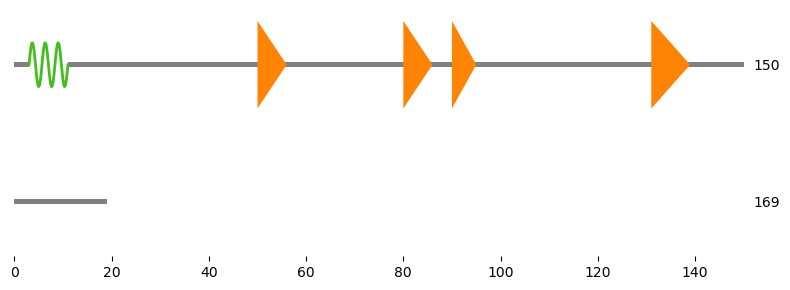

In [45]:
array = strucio.load_structure("data/6yj1.pdb") # loading the true structure to biotite
sse_6yj1 = struc.annotate_sse(array, chain_id="A") # annotate each residue according to what secondary structure it belongs to
visualize_secondary_structure(sse_6yj1, array.res_id[0]) # use the visualization function defined above
plt.show() # render the result

Remark on the visualization

#### 7FVU

Here we do the same as above for another structure.

In [46]:
structure_true_7fvu = PDBParser().get_structure("true", "data/7fvu.pdb")[0]
structure_pred_7fvu = PDBParser().get_structure("pred", "output/7FVU_1|Chain A|Fatty acid-binding protein, adipocyte|Homo sapiens (9606).pdb")[0]

In [47]:
cea = cealign.CEAligner()
cea.set_reference(structure_true_7fvu)
cea.align(structure_pred_7fvu, transform=True)
cea.rms

0.4792816996232876

Remark on RMS

In [48]:
view_aligned = nv.show_biopython(structure_true_7fvu["A"])
view_aligned.update_cartoon(color='blue')
view_aligned.add_structure(nv.BiopythonStructure(structure_pred_7fvu["A"]))
view_aligned.update_cartoon(color='orange', component=1)
view_aligned

NGLWidget()

Remark on alignment

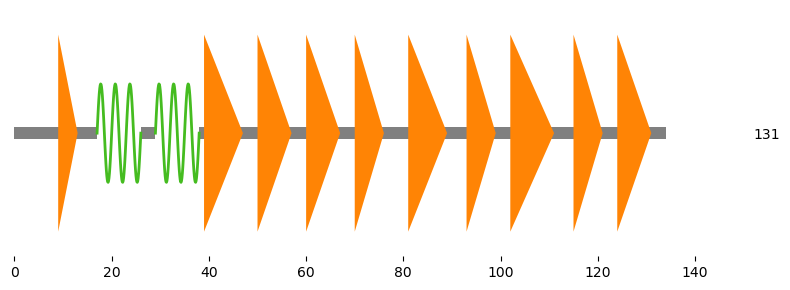

In [49]:
array = strucio.load_structure("data/7fvu.pdb")
sse_7fvu = struc.annotate_sse(array, chain_id="A")
visualize_secondary_structure(sse_7fvu, array.res_id[0])
plt.show()

Remark on vis

### Analyzing the secondary structures

#### 6YJ1

helices rmsd: 26.282669013290235
sheets rmsd: 17.84655181498534
loops rmsd: 20.883112010463293
average confidence for helices: 37.42
average confidence for sheets: 91.74
average confidence for loops: 92.92


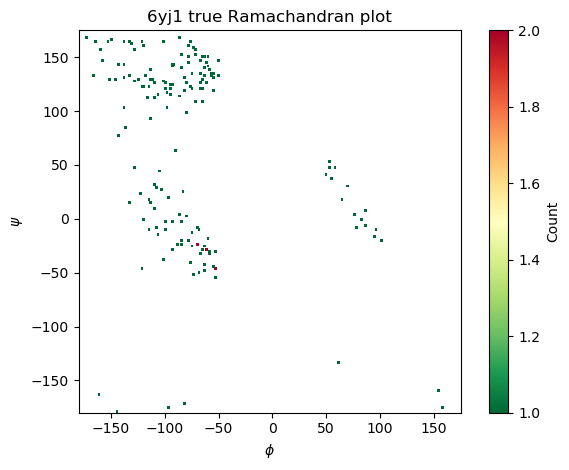

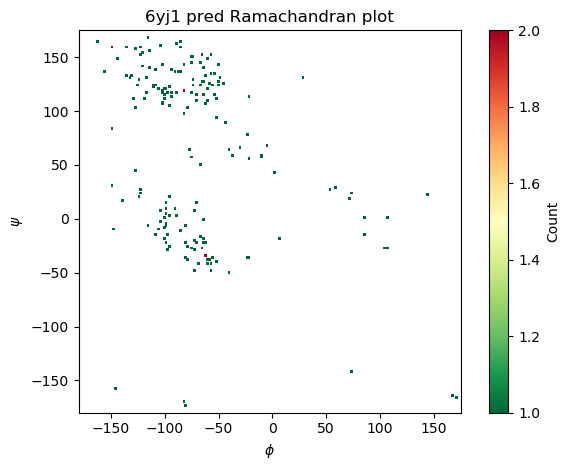

In [50]:
find_secondary_structures_RMSDs(structure_true_6yj1, structure_pred_6yj1, sse_6yj1)
find_secondary_structure_median_confidences(structure_pred_6yj1, sse_6yj1)
plot_ramachandran_plot("data/6yj1.pdb", "6yj1 true")
plot_ramachandran_plot("output/0th chain.pdb", "6yj1 pred")

#### 7FVU

helices rmsd: 1.2065100088766818
sheets rmsd: 0.9634398871842591
loops rmsd: 1.281280179743683
average confidence for helices: 96.07
average confidence for sheets: 97.87
average confidence for loops: 95.04


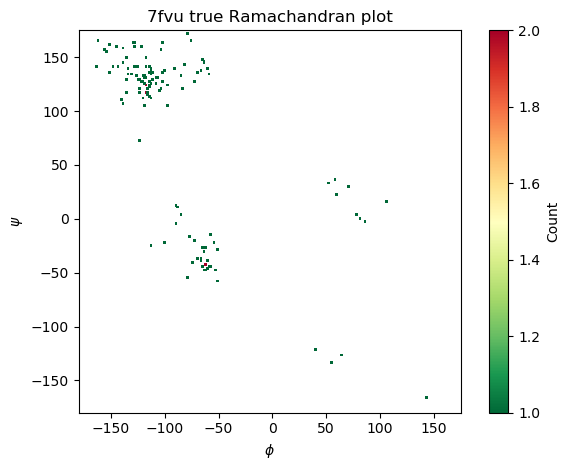

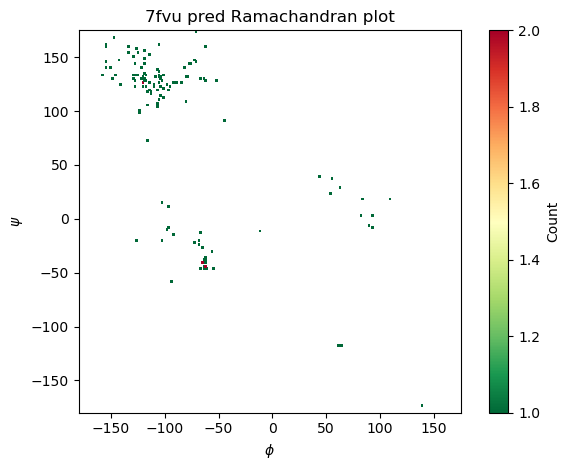

In [51]:
find_secondary_structures_RMSDs(structure_true_7fvu, structure_pred_7fvu, sse_7fvu)
find_secondary_structure_median_confidences(structure_pred_7fvu, sse_7fvu)
plot_ramachandran_plot("data/7fvu.pdb", "7fvu true")
plot_ramachandran_plot("output/7FVU_1|Chain A|Fatty acid-binding protein, adipocyte|Homo sapiens (9606).pdb", "7fvu pred")

By observing the RMSD values per secondary structure for the second protein, we find that loops are associated with the highest RMSD value. This is plausible since loops are flexible and hence harder to predict. Contrastingly, helices and sheets are more predictable since they're less flexible.

Looking at the RMSD values for the first protein, we can tell that something's off, what we get is counterintuitive. This can be potentially explained by the fact that the first protein is discontinuous and is missing some residues. This may have caused this drastic increase in RMSD for helices (higher value than loops). Surely enough, the second highest RMSD was for loops followed by sheets. It is important to remember that the overall prediction for the first protein was lacking (as we can see by the overall RMSD for all residues).

As for the median confidence values, they are in line with what we got for the RMSD values per secondary structure. With the lowest median confidence value being associated with the helices in protein one. As for the second protein, the model was the least confident predicting loops compared to helices and sheets. Confirming the intuition from before.

*One thing to note about the confidence values, we can see in the code that they are being extracted from each atom's `b_factor`. Why is that? It is a convention used by OmegaFold, where after prediction the atom-level confidences are stored in the resulting `PDB` file in the `b_factor` column.*

With **Plot 1.** in mind, we point out several things:
- In the first protein (6yj1), the plot for the prediction doesn't align very well with the plot for the ground truth which is to be expected. This is contrary to what we for the second protein (7fvu). In this case, the plots align more nicely.
- We see some outliers, in the white region, for both proteins. This can be explained by the possibility of those atoms pertaining to Glycine. Due to the nature of Glycine it can be present in all four quadrants.
- The second protein has relatively much less alpha helices compared to the first protein despite that it has fewer residues.

<br/>
<img src="./images/rama.gif"  width="600">

**Plot 1**: Shows viable regions in the Ramachandran plot. The white regions on the other hand correspond to disallowed conformations. Disallowed conformations are those conformations where atoms come closer than the sum of their van der Waals radi. Count is the number of occurrences for the corresponding phi and psi angles. A Ramachandran plot shows rotations within the protein represented by the torsion angles (phi and psi). [Source](https://www.cryst.bbk.ac.uk/PPS95/course/3_geometry/rama.html).

### Summary

In addition to the first protein being discontinuous, it was also published in the PDB at a date that may or may not mean it was used for the training of OmegaFold. This is another take away to keep in mind. That being said, the second protein was specifically chosen to be recent (published after OmegaFold itself). This avoids the potential of leakage. However, OmegaFold could have likely been trained on proteins that share segments with our second protein.

All of the above being said, we will move to discussing the predictions. The prediction of the second protein was a lot better than the first, this can be attributed to the discontinuous nature of the first. It is possible, however, that the model simply was unable to make a prediction of higher quality.

The RMSD values after aligning each of the protein predictions to their ground truths tell the same story. The first protein obtained an RMSD score (over all of its residues) of 5.65 Angstroms. That is not very good as we've already demonstrated. On the other hand, the second protein had an RMSD value of 0.47 Angstroms.
$$
    RMSD = \sqrt{\frac{1}{N}\sum^N_{i=1}\delta^2_i
$$

An RMSD value is a measure of the mean distance between residues between two aligned proteins (superimposed proteins). Practically, it is used to give a holistic view of the quality of the prediction. As we have demonstrated, it is often useful to disect this measure to see where those deviations have occurring, that is, at the secondary structure level rather than the global level.

## Discussion

Using any of the structure prediction SOTA methods, it is viable to adequately predict a protein's fold from a sequence of amino acids. However, the story does not end here. OmegaFold fills a pivotal gap, as it is able to make predictions from sequences for which MSAs are not readily available. Future advancements in this field should facilitate a plethora of applications, including multi-state conformational sampling, variant effect prediction, intra-protein interactions, and protein docking. As important as it is to predict the fold, it is equally important to find protein conformations that bind to a binding partner of interest or the other way around. That is what dictates protein function. That way, we can design effective drugs for virtually any disease or to solve dire challenges with bioengineering.

## Quiz

- Investigate the trade-off of computation time and average prediction quality, by changing the number of cycles. How bad was the prediction?
- Trade computation time for memory consumption, by changing subbatch size. How drastic are the reductions?
- Look into using a different alignment algorithm (other than CE) and observe the RMS estimate. Does it differ?
- Search the protein data bank (PDB) for another protein and attempt to fold it. Does the model perform as well, better, or worse than expected? Compare this to the example in Practical. More here: [PDB](https://www.rcsb.org/)
- Another similar task is to look up another protein from the ones published for CASP14. Predict its structure and compare the accuracy to that of AlphaFold2. More here: [CASP14](https://predictioncenter.org/casp14/)
- If you're up for a challenge, in a separate notebook, use AlphaFold2 and OmegaFold to predict the same protein and compare. More here: [AlphaFold2's GitHub page](https://github.com/deepmind/alphafold) and [RoseTTAFold's GitHub page](https://github.com/RosettaCommons/RoseTTAFold)
- Some more practice, also something to help you understand how far we've come, but is also a challenge. Implement an older method, perhaps one that uses a CNN or a physics-based one to predict a protein structure. More here: [DeepCov](https://github.com/psipred/DeepCov)